**Problem:** The Sales Data Sample
The provided data represents information from a marketing campaign. We you provided information
about the product in the campaign/offer that was send to a specific customer and the convergence
result of this campaign (label attribute).

#Importing libraries


In [ ]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webcolors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.spatial import KDTree
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPool1D, MaxPooling1D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
import datetime
import calendar
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
import itertools

#Reading data

In [ ]:
df = pd.read_csv('rokeplay.csv')

In [ ]:
df.head(40)

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
5,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,1
6,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
7,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,1
8,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0
9,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,1


#Preprocessing

##Checking column names, Null values, dataframe shape

In [ ]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())
#print(df.isna().sum())
df.dropna(inplace=True)

(100000, 24)
Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  

##Feature Engineering

###RGB parsing

In [ ]:
def rgb_to_name(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES

    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'{names[index]}'

In [ ]:
df['primary_color'] = df.apply(lambda row: rgb_to_name(tuple([row['rgb_r_main_col'], row['rgb_g_main_col'], row['rgb_b_main_col']])), axis=1)
df['secondary_color'] = df.apply(lambda row: rgb_to_name(tuple([row['rgb_r_sec_col'], row['rgb_g_sec_col'], row['rgb_b_sec_col']])), axis=1)

###Retail-week parsing

In [ ]:
df['year'] = df.retailweek.apply(lambda x: int(x.split('-')[0]))
df['month'] = df.retailweek.apply(lambda x: int(x.split('-')[1]))
df['day'] = df.retailweek.apply(lambda x: int(x.split('-')[2]))

###Date-time parsing

In [ ]:
def week_num(year, month, day):
  date = datetime.date(year, month, day)
  weekn = date.isocalendar().week
  return weekn

In [ ]:
df['week_number'] = df.retailweek.apply(lambda x: week_num(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])))

###Total sales calculation

In [ ]:
df['total_sales'] = df.apply(lambda row: row['sales'] * row['current_price'], axis=1)
df['total_sales_p1_0'] = df.apply(lambda row: row['sales'] * row['current_price'] if row['promo1'] == 0 else 0, axis=1)
df['total_sales_p1_1'] = df.apply(lambda row: row['sales'] * row['current_price'] if row['promo1'] == 1 else 0, axis=1)
df['total_sales_p2_0'] = df.apply(lambda row: row['sales'] * row['current_price'] if row['promo2'] == 0 else 0, axis=1)
df['total_sales_p2_1'] = df.apply(lambda row: row['sales'] * row['current_price'] if row['promo2'] == 1 else 0, axis=1)

#Exploratory Data Analysis (EDA)

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.drop(['regular_price','ratio','article','sales','customer_id','rgb_r_main_col','rgb_g_main_col','rgb_b_main_col','rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col'],axis=1)

In [ ]:
def scatter(df2,col):
  plt.figure(figsize=(10,10))
  plt.scatter(df2[col], df2['total_sales'], color='turquoise')
  plt.ylabel('Weekly Sales')
  plt.xlabel(col)

##Pie charts

In [ ]:
pie_chart = df[['year', 'productgroup', 'category','gender']]

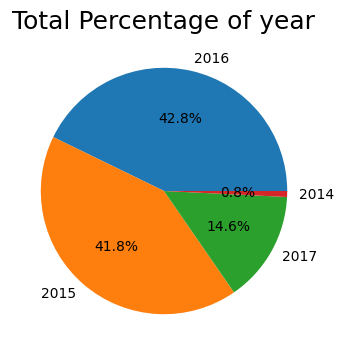

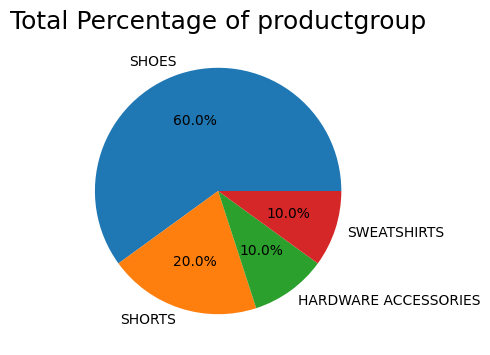

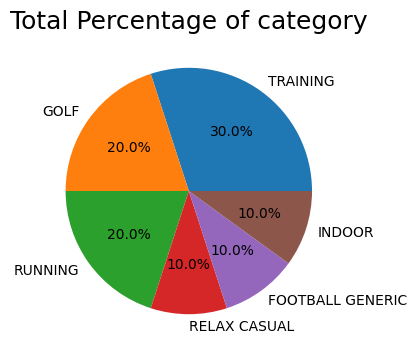

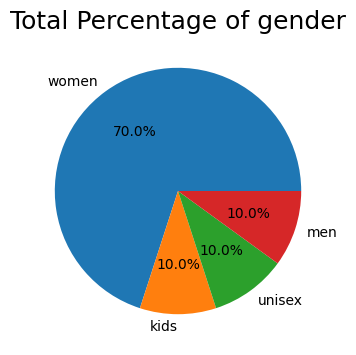

In [ ]:
for i in pie_chart.columns:
  plt.figure(figsize=(4,4))
  plt.title('Total Percentage of '+i, fontsize=18)
  plt.pie(df2[i].value_counts()/len(df2),labels=df2[i].unique(),autopct='%1.1f%%')
  plt.show()

##Line graphs

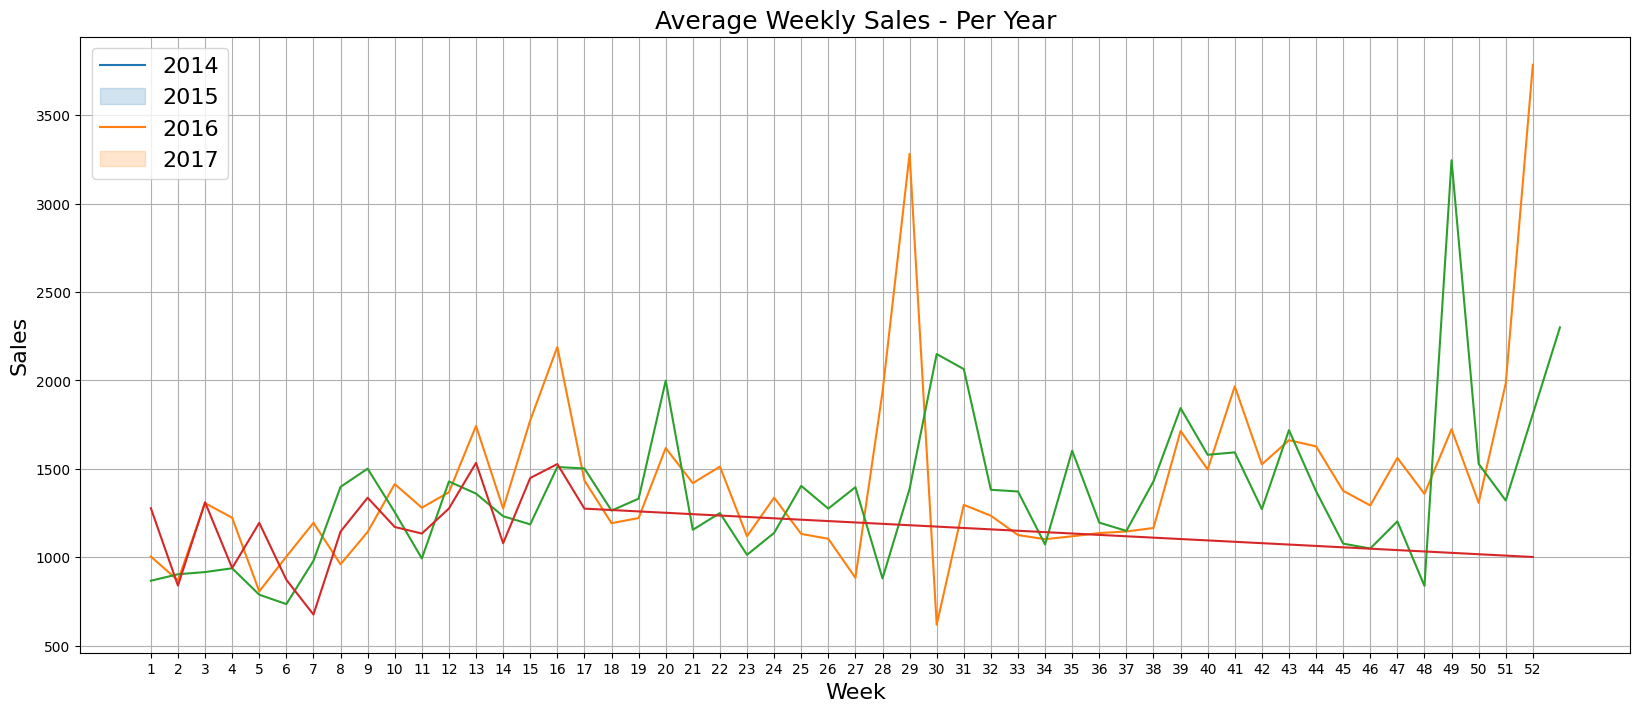

In [ ]:
weekly_sales_2014 = df2[df2.year==2014]['total_sales'].groupby(df2['week_number']).mean()
weekly_sales_2015 = df2[df2.year==2015]['total_sales'].groupby(df2['week_number']).mean()
weekly_sales_2016 = df2[df2.year==2016]['total_sales'].groupby(df2['week_number']).mean()
weekly_sales_2017 = df2[df2.year==2017]['total_sales'].groupby(df2['week_number']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(x = weekly_sales_2014.index, y = weekly_sales_2014.values)
sns.lineplot(x = weekly_sales_2015.index, y = weekly_sales_2015.values)
sns.lineplot(x = weekly_sales_2016.index, y =  weekly_sales_2016.values)
sns.lineplot(x = weekly_sales_2017.index, y = weekly_sales_2017.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2014', '2015', '2016','2017'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

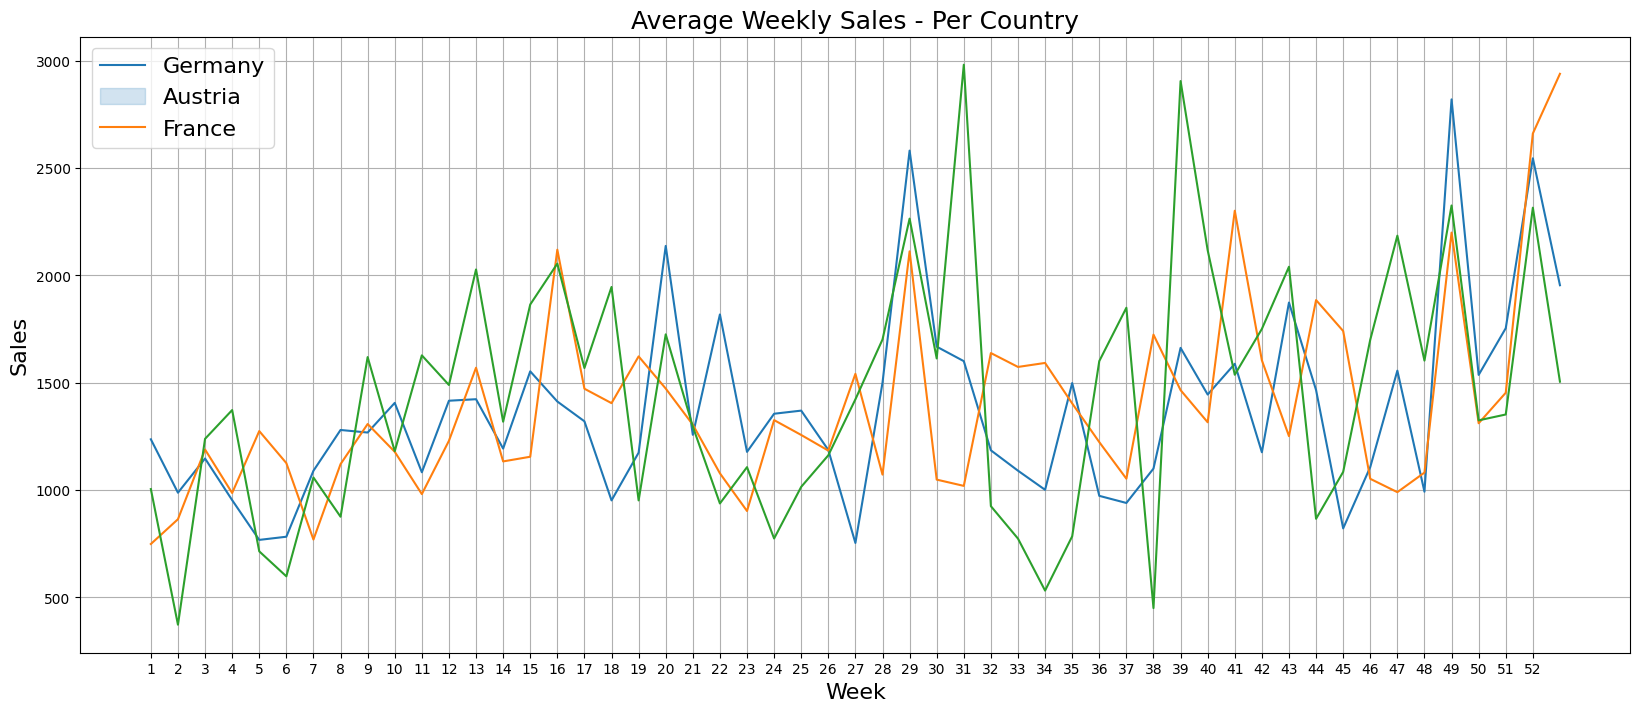

In [ ]:
german_sales = df2[df2.country=='Germany']['total_sales'].groupby(df2['week_number']).mean()
austrian_sales = df2[df2.country=='Austria']['total_sales'].groupby(df2['week_number']).mean()
french_sales = df2[df2.country=='France']['total_sales'].groupby(df2['week_number']).mean()
    
plt.figure(figsize=(20,8))
sns.lineplot(x = german_sales.index, y = german_sales.values)
sns.lineplot(x = austrian_sales.index, y = austrian_sales.values)
sns.lineplot(x = french_sales.index, y =  french_sales.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['Germany', 'Austria', 'France'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Country', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

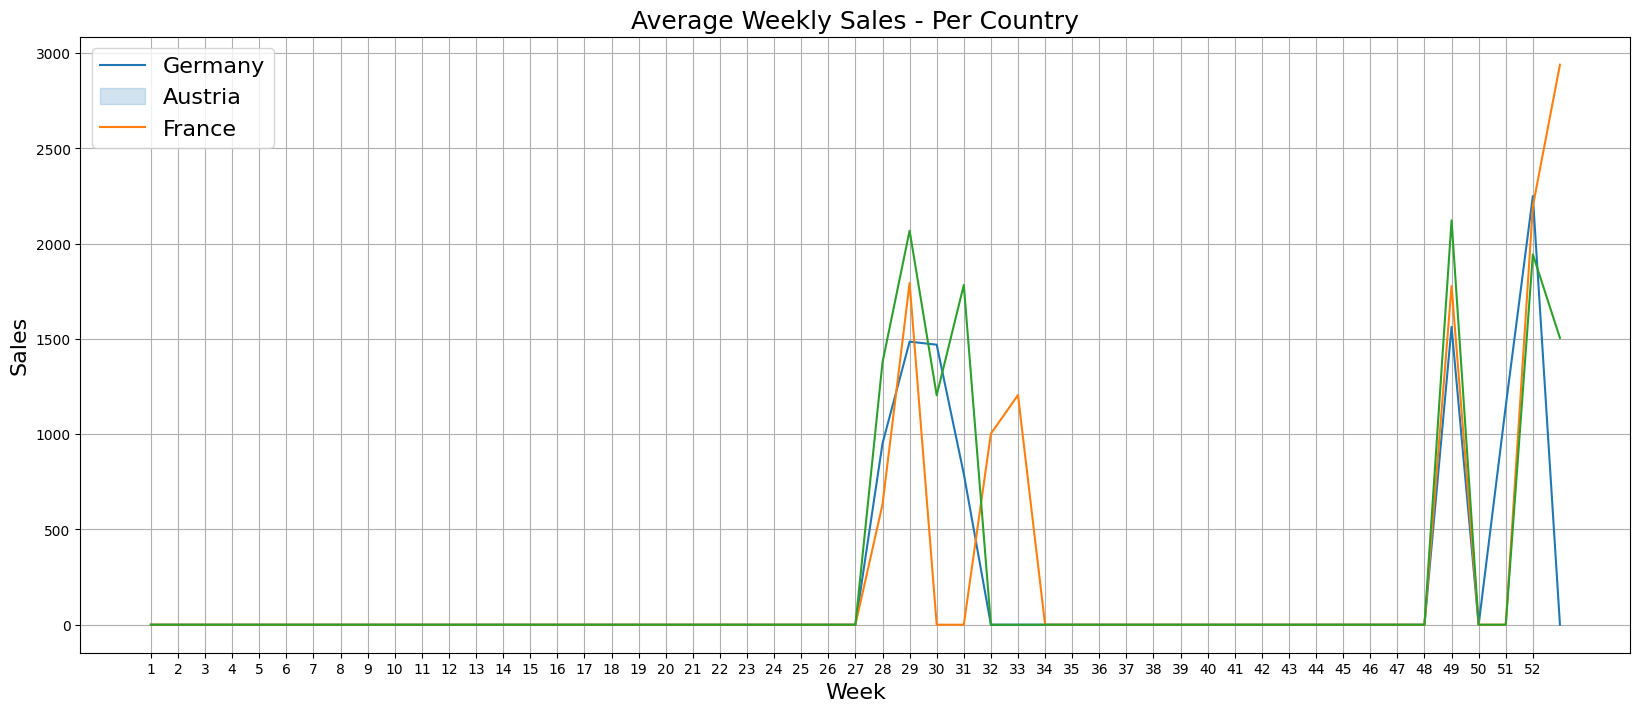

In [ ]:
german_sales_p1 = df[df.country=='Germany']['total_sales_p1_1'].groupby(df['week_number']).mean()
austrian_sales_p1 = df[df.country=='Austria']['total_sales_p1_1'].groupby(df['week_number']).mean()
french_sales_p1 = df[df.country=='France']['total_sales_p1_1'].groupby(df['week_number']).mean()
    
plt.figure(figsize=(20,8))
sns.lineplot(x = german_sales_p1.index, y = german_sales_p1.values)
sns.lineplot(x = austrian_sales_p1.index, y = austrian_sales_p1.values)
sns.lineplot(x = french_sales_p1.index, y =  french_sales_p1.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['Germany', 'Austria', 'France'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Country', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

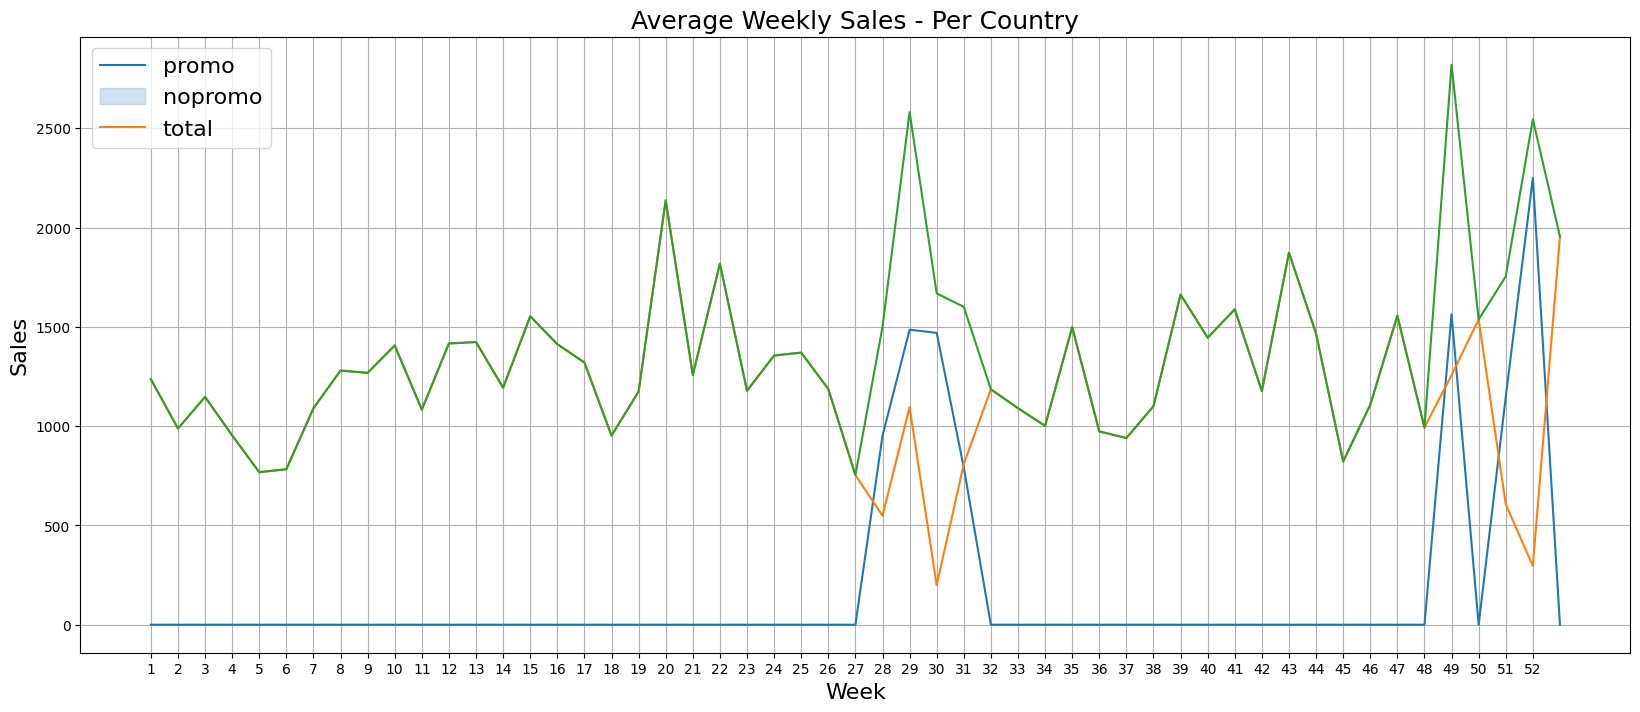

In [ ]:
# orange no promo, Blue promo, green TOTAL
withpromo1 = df[df.country=='Germany']['total_sales_p1_1'].groupby(df['week_number']).mean()
nopromo1 = df[df.country=='Germany']['total_sales_p1_0'].groupby(df['week_number']).mean()
totalwithpromo1 = df[df.country=='Germany']['total_sales'].groupby(df['week_number']).mean()
    
plt.figure(figsize=(20,8))
sns.lineplot(x = withpromo1.index, y = withpromo1.values)
sns.lineplot(x = nopromo1.index, y = nopromo1.values)
sns.lineplot(x = totalwithpromo1.index, y =  totalwithpromo1.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['promo', 'nopromo', 'total'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Country', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

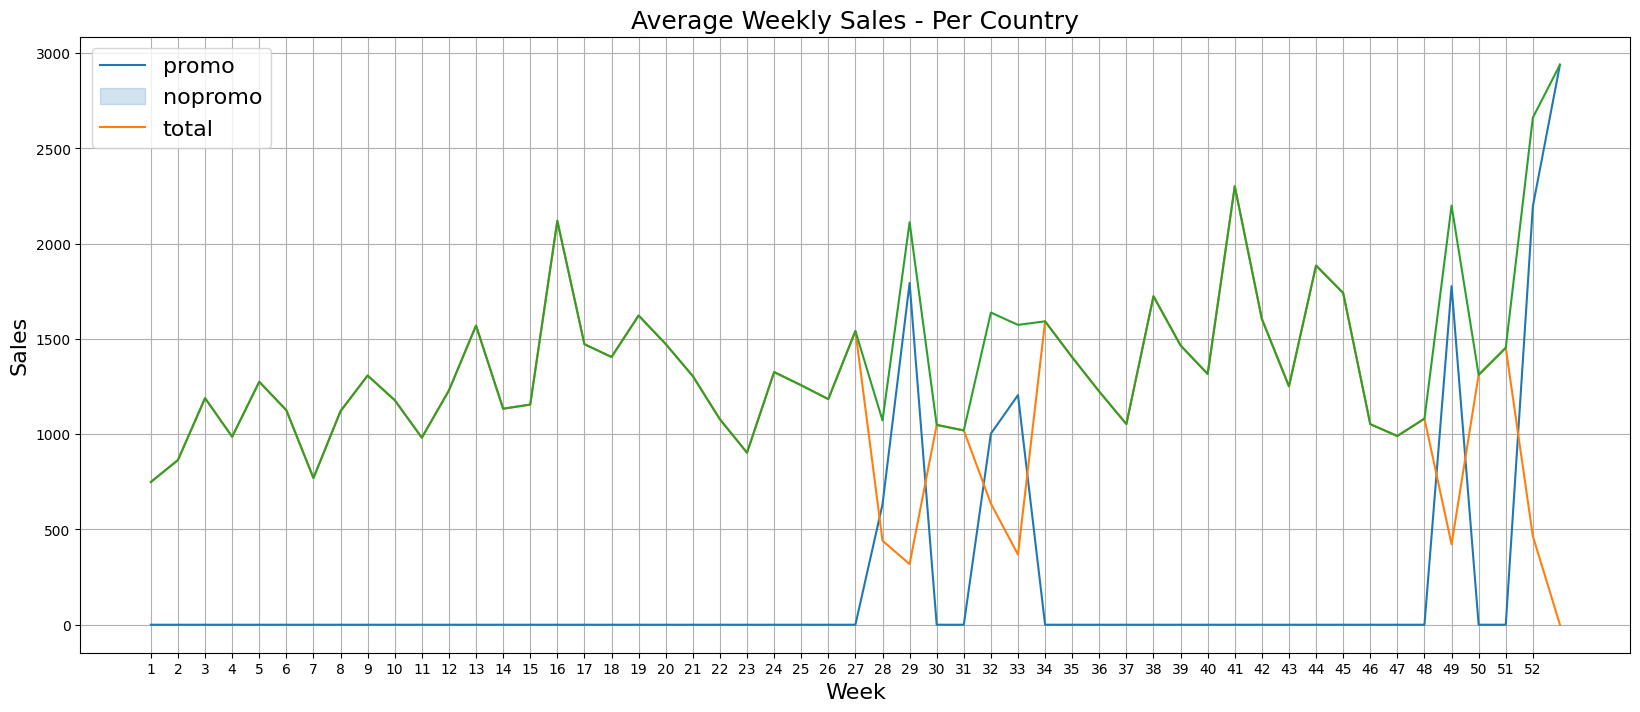

In [ ]:
# orange no promo, Blue promo, green TOTAL

withpromo1 = df[df.country=='Austria']['total_sales_p1_1'].groupby(df['week_number']).mean()
nopromo1 = df[df.country=='Austria']['total_sales_p1_0'].groupby(df['week_number']).mean()
totalwithpromo1 = df[df.country=='Austria']['total_sales'].groupby(df['week_number']).mean()
    
plt.figure(figsize=(20,8))
sns.lineplot(x = withpromo1.index, y = withpromo1.values)
sns.lineplot(x = nopromo1.index, y = nopromo1.values)
sns.lineplot(x = totalwithpromo1.index, y =  totalwithpromo1.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['promo', 'nopromo', 'total'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Country', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

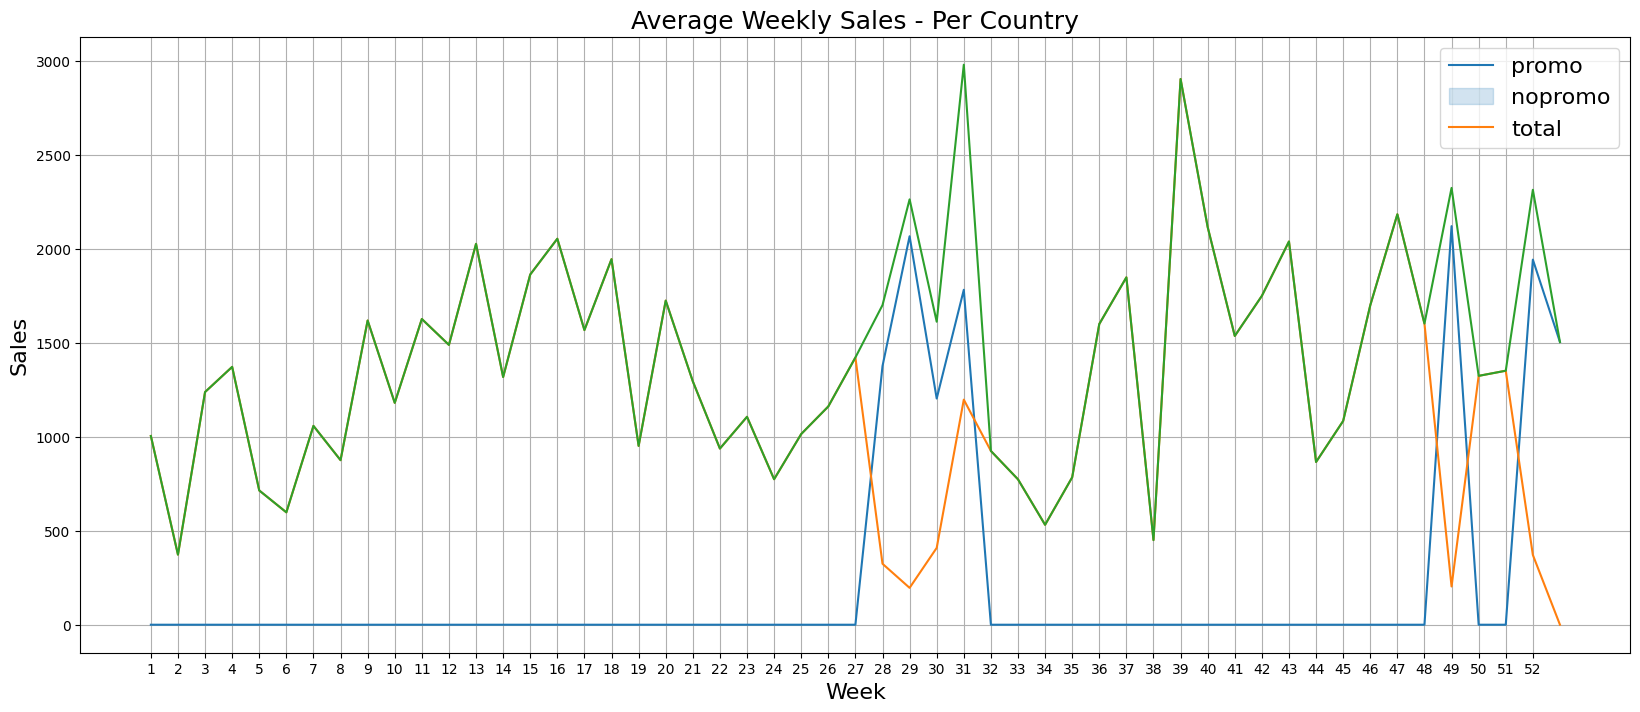

In [ ]:
# orange no promo, Blue promo, green TOTAL

withpromo1 = df[df.country=='France']['total_sales_p1_1'].groupby(df['week_number']).mean()
nopromo1 = df[df.country=='France']['total_sales_p1_0'].groupby(df['week_number']).mean()
totalwithpromo1 = df[df.country=='France']['total_sales'].groupby(df['week_number']).mean()
    
plt.figure(figsize=(20,8))
sns.lineplot(x = withpromo1.index, y = withpromo1.values)
sns.lineplot(x = nopromo1.index, y = nopromo1.values)
sns.lineplot(x = totalwithpromo1.index, y =  totalwithpromo1.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['promo', 'nopromo', 'total'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Country', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

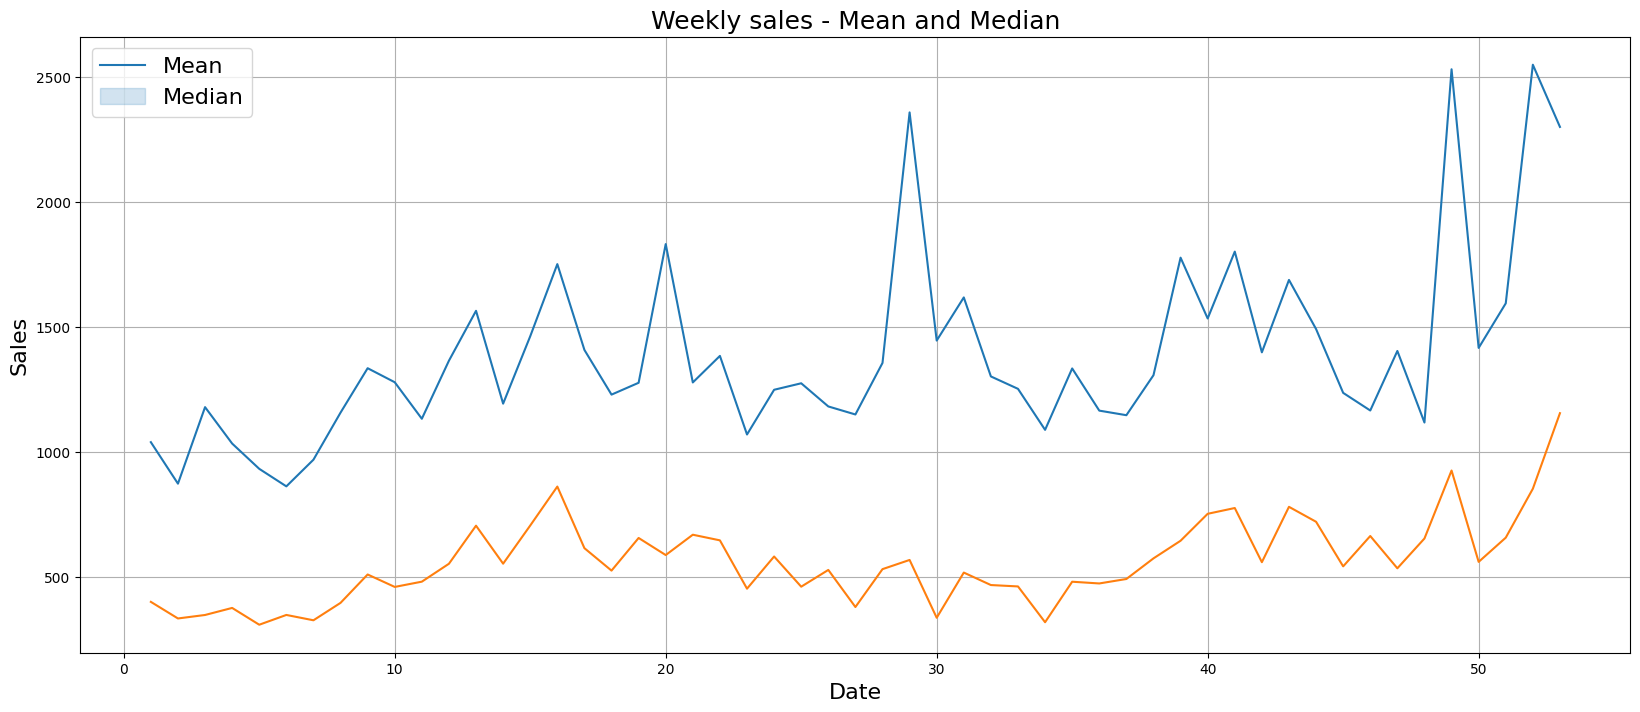

In [ ]:
weekly_sales_mean = df2['total_sales'].groupby(df2['week_number']).mean()
weekly_sales_median = df2['total_sales'].groupby(df2['week_number']).median()
plt.figure(figsize=(20,8))
sns.lineplot(x = weekly_sales_mean.index, y = weekly_sales_mean.values)
sns.lineplot(x = weekly_sales_median.index, y = weekly_sales_median.values)

plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

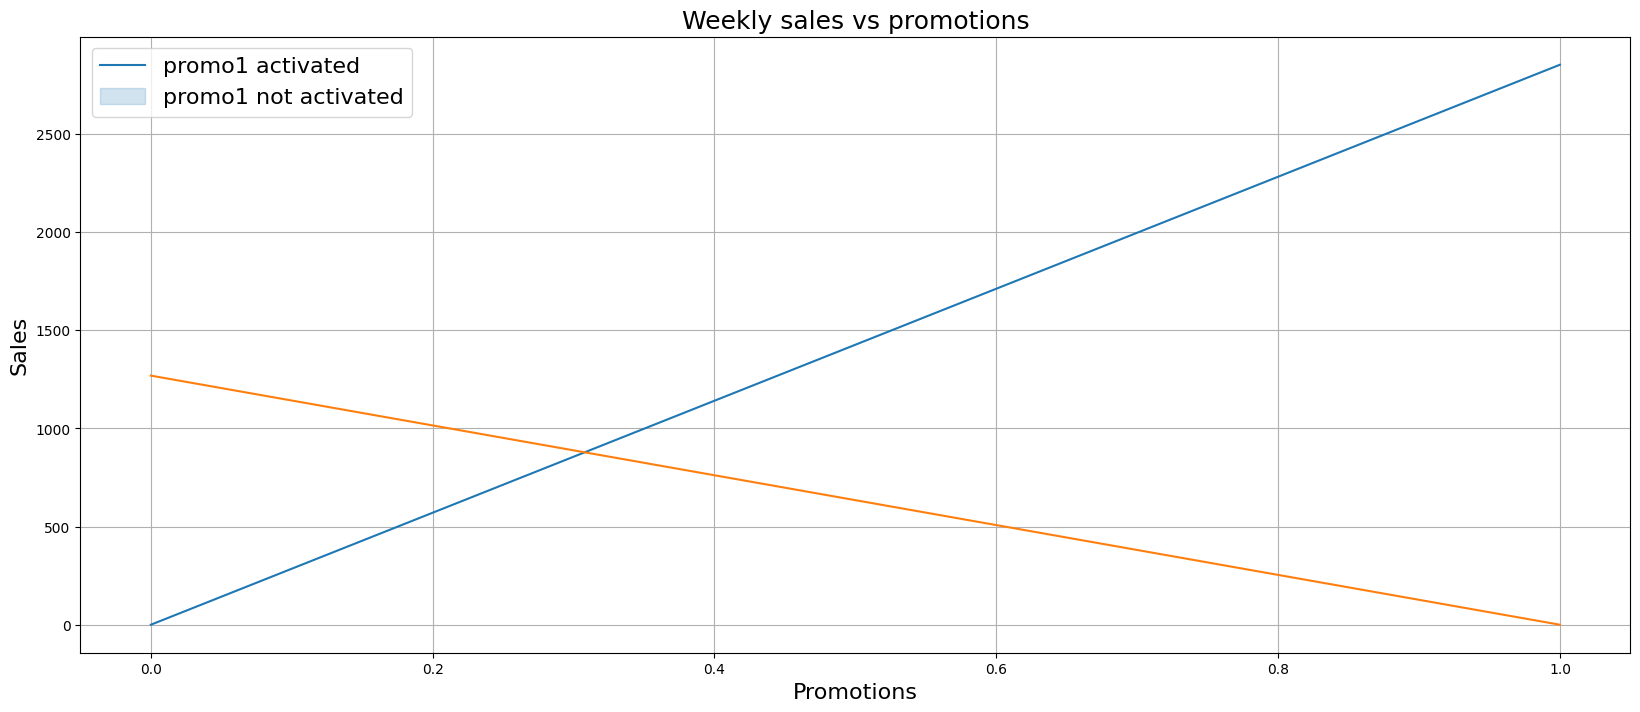

In [ ]:
promo1_sales = df['total_sales_p1_1'].groupby(df['promo1']).mean()
promo2_sales = df['total_sales_p1_0'].groupby(df['promo1']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(x = promo1_sales.index, y = promo1_sales.values)
sns.lineplot(x = promo2_sales.index, y = promo2_sales.values)

plt.grid()
plt.legend(['promo1 activated', 'promo1 not activated'], loc='best', fontsize=16)
plt.title('Weekly sales vs promotions', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Promotions', fontsize=16)
plt.show()

<Axes: >

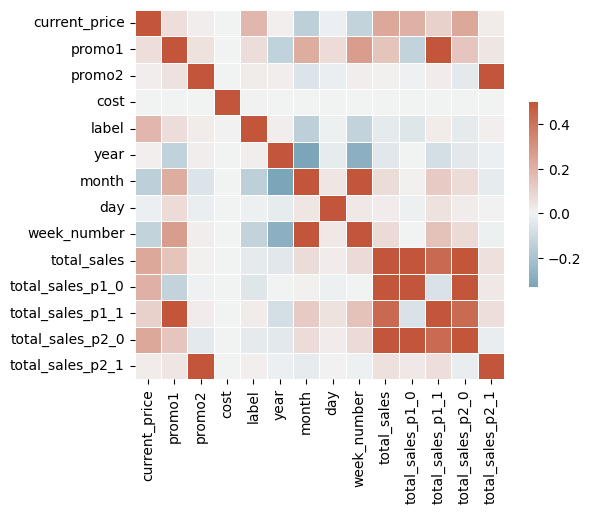

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df2.corr(), cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Continous variables

In [ ]:
continous_df = df[['total_sales', 'regular_price', 'current_price','ratio', 'promo1', 'promo2','cost','week_number']]

###Scatter plot

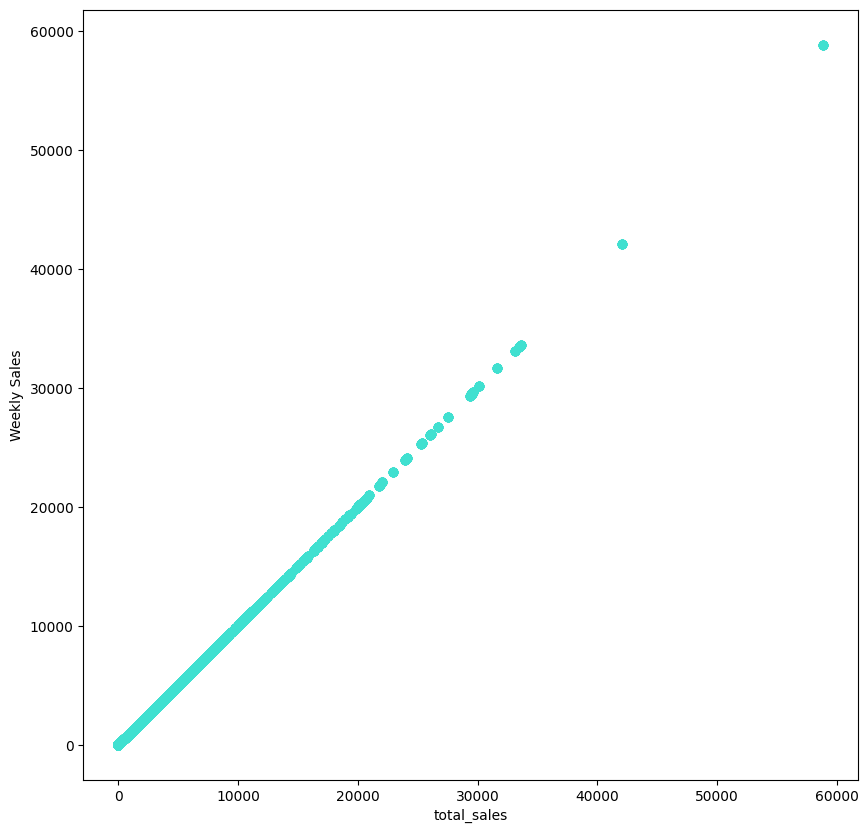

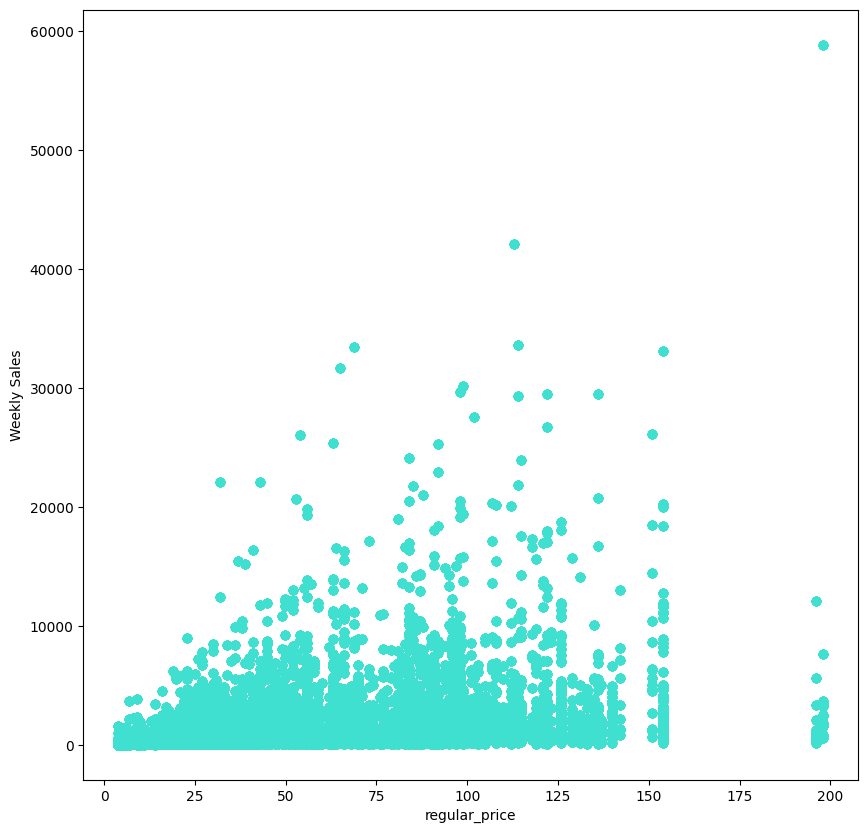

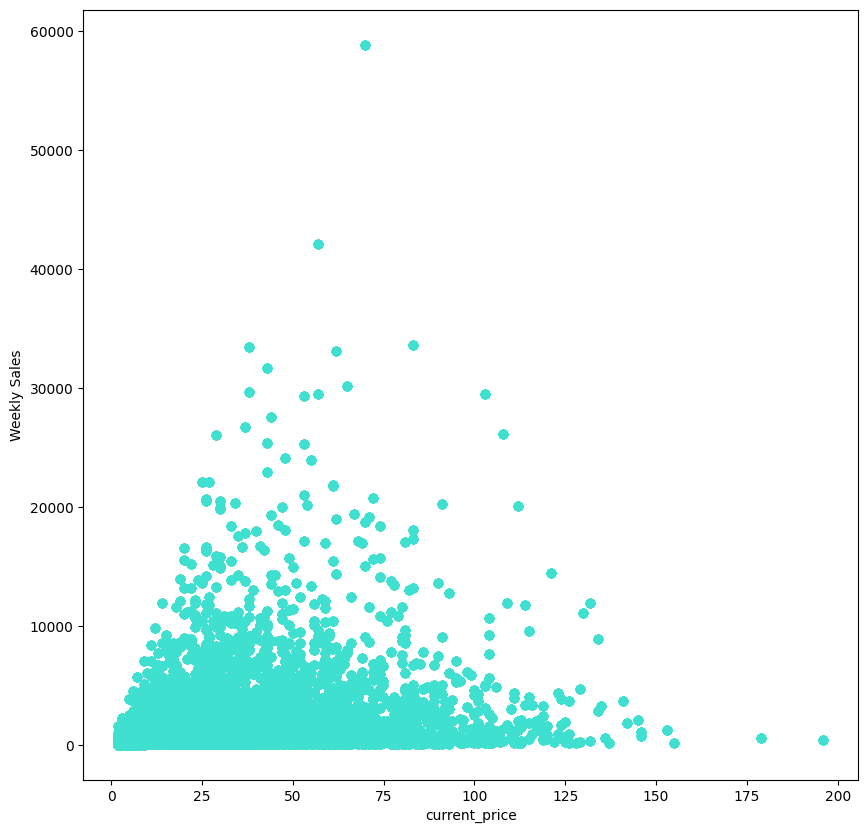

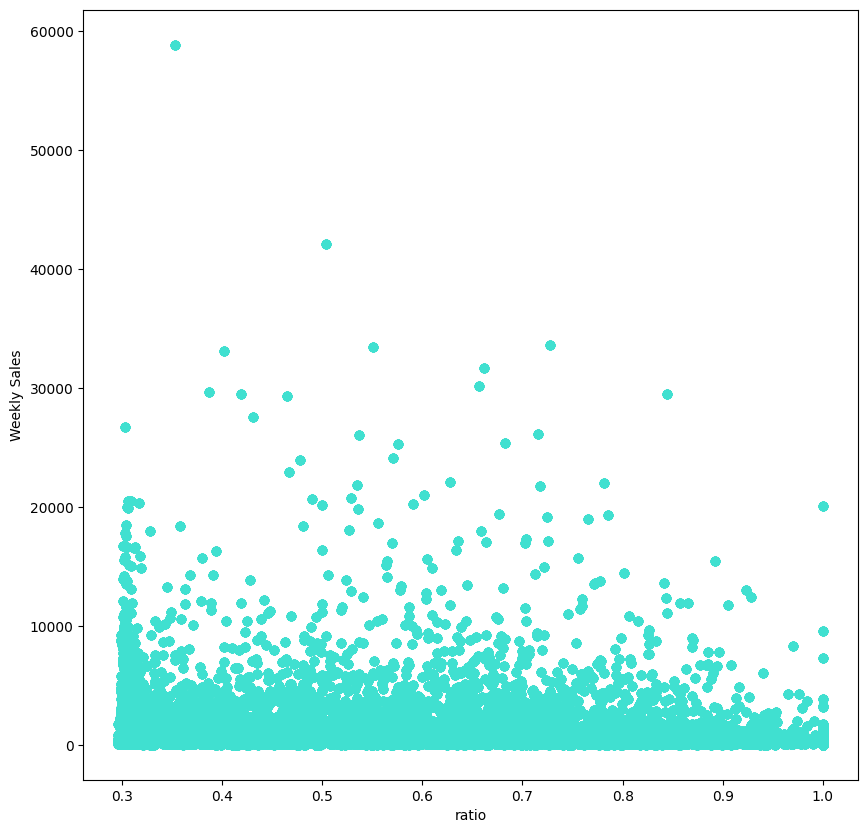

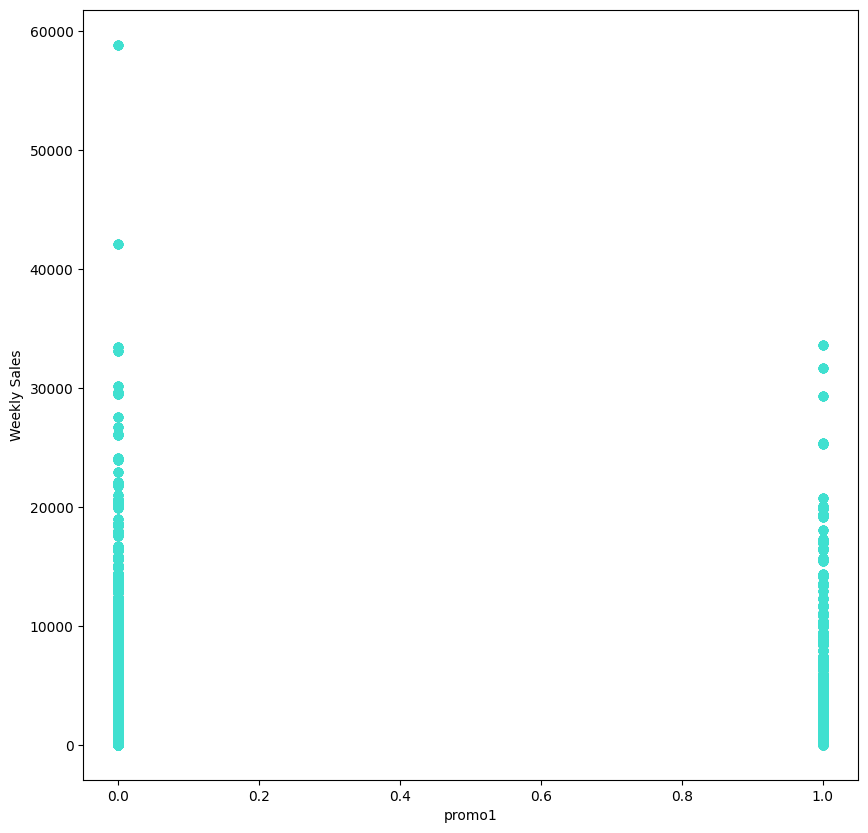

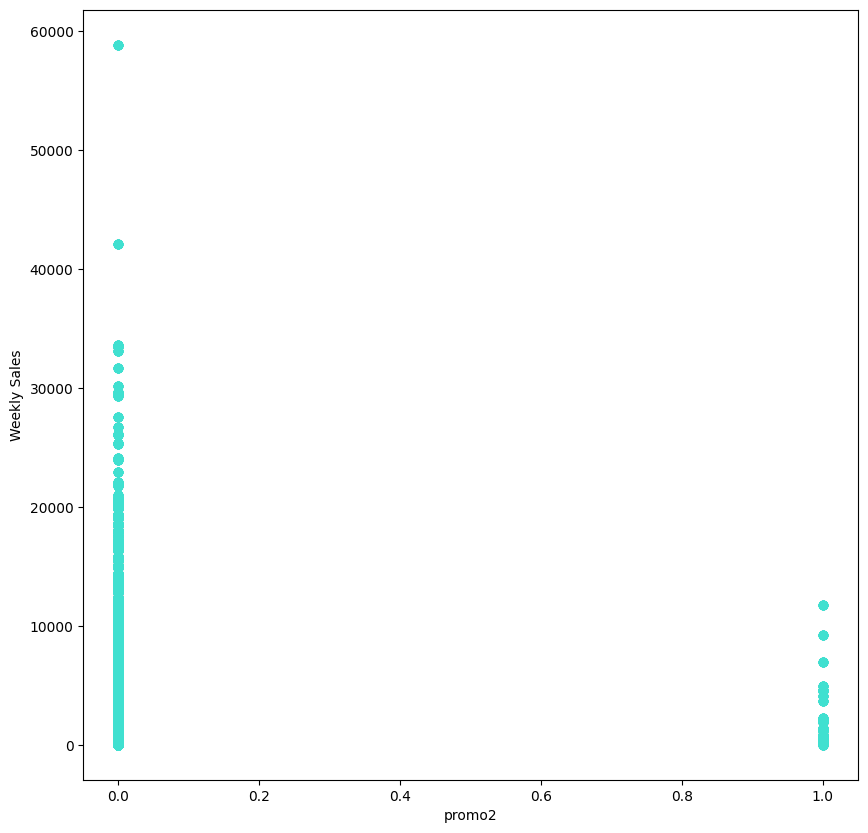

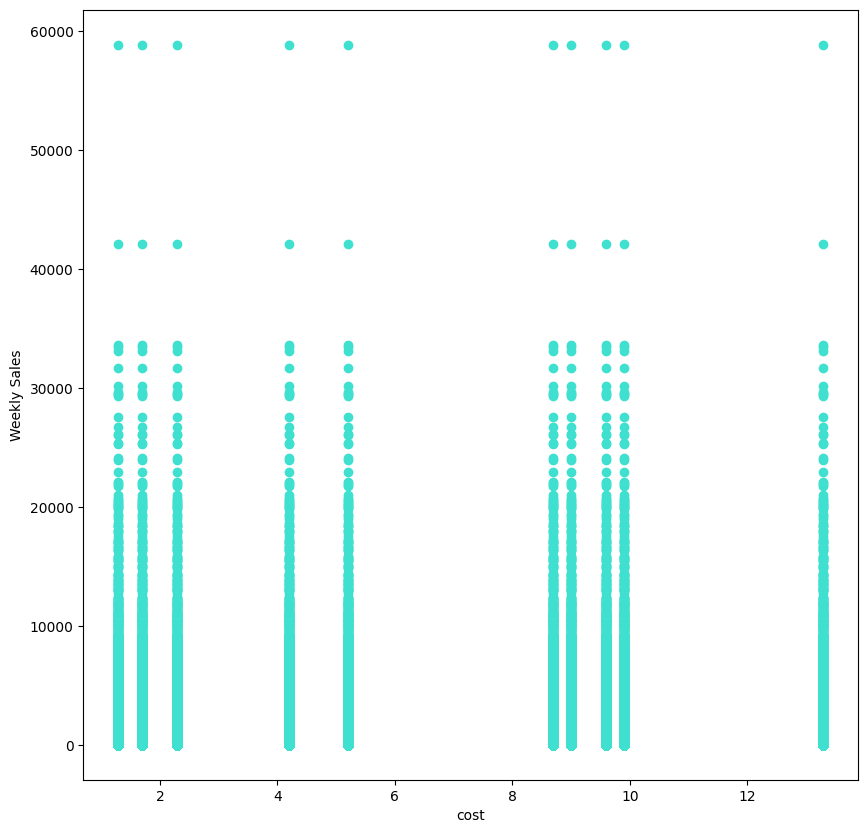

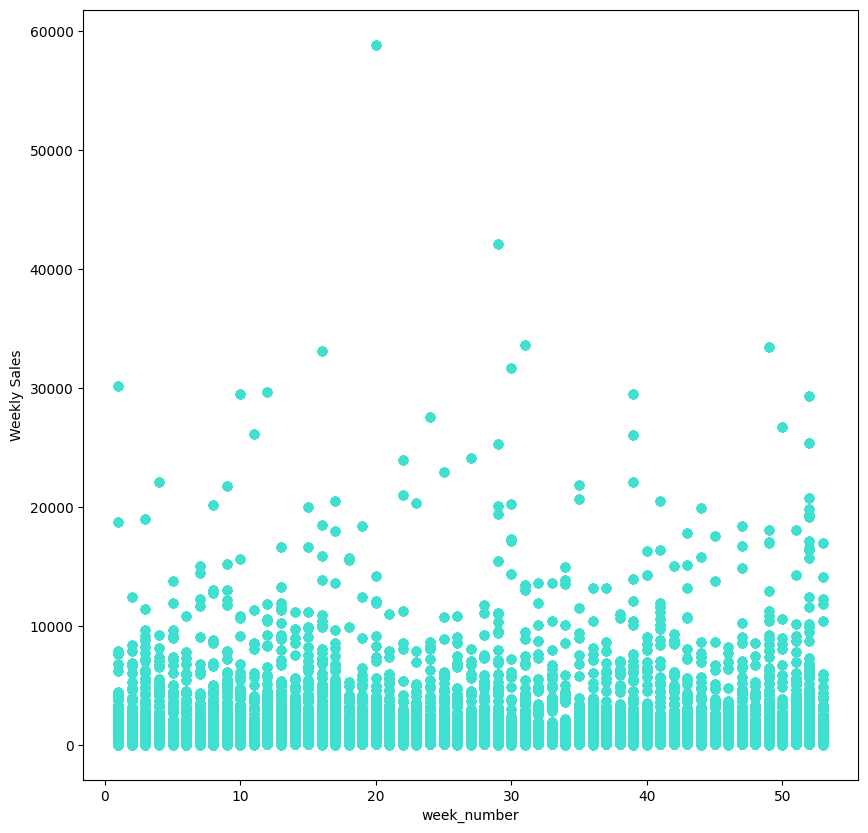

In [ ]:
for i in continous_df.columns:
  scatter(continous_df,i)

###Histogram

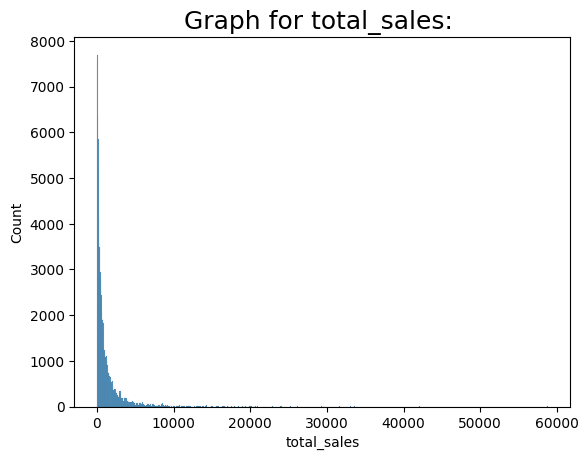

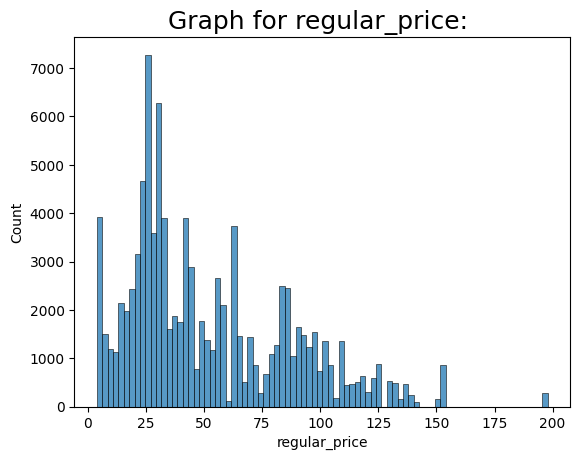

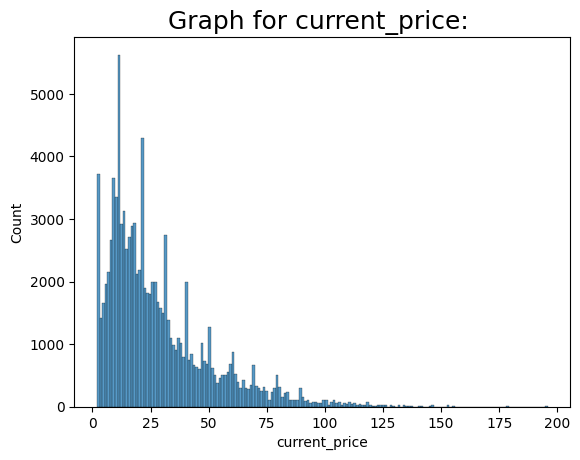

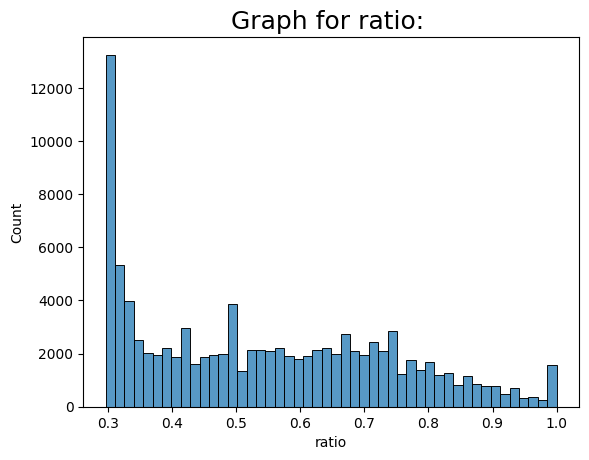

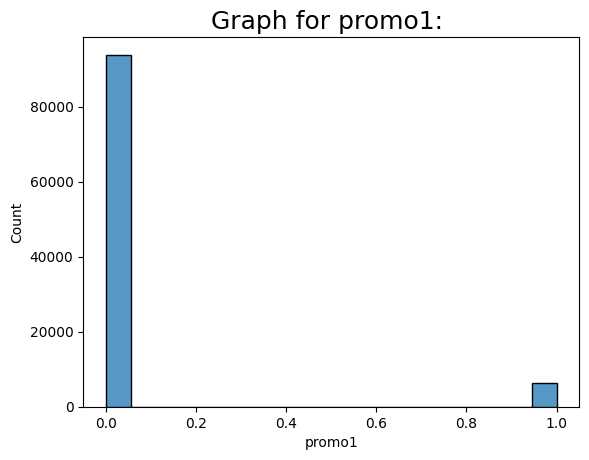

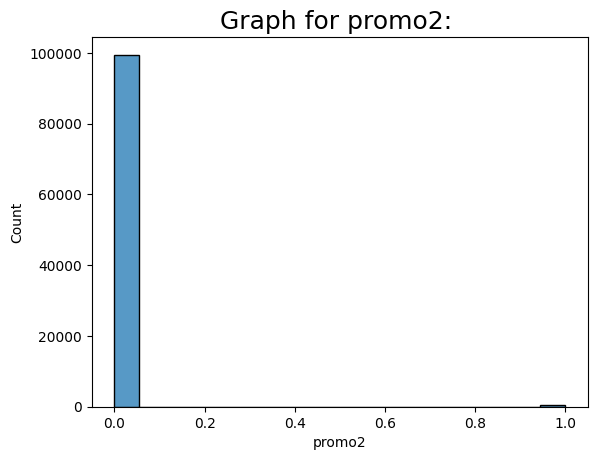

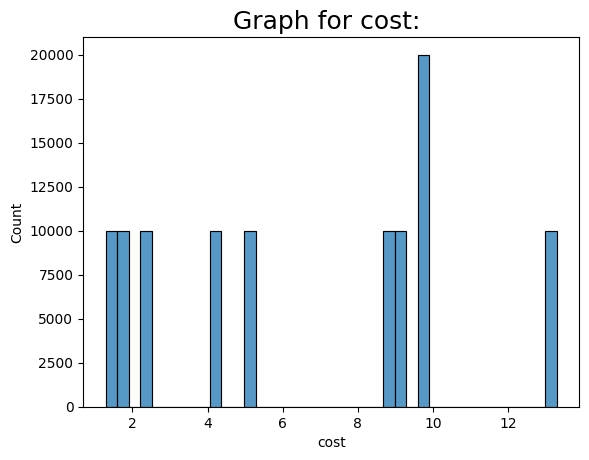

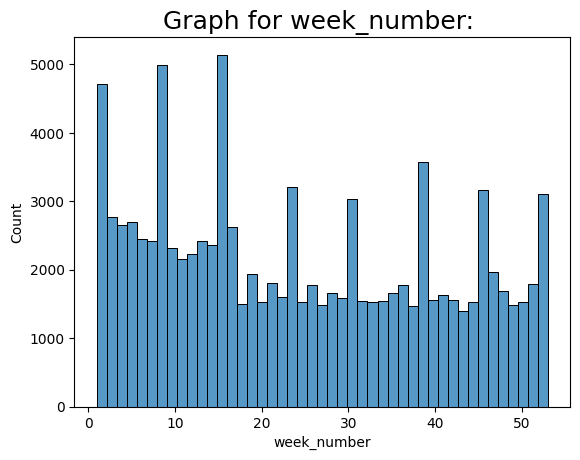

In [ ]:
for col in continous_df.columns:
    plt.title('Graph for %s: '%(col) ,fontsize=18)
    sns.histplot(df[col])
    plt.show()
    print('\n\n')

###Box plot

<Axes: >

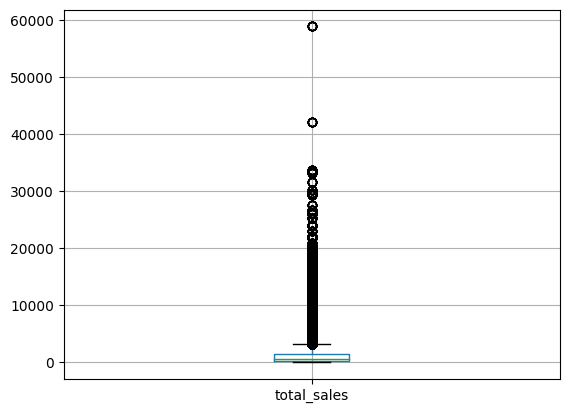

In [ ]:
continous_df.boxplot(column='total_sales')

<Axes: >

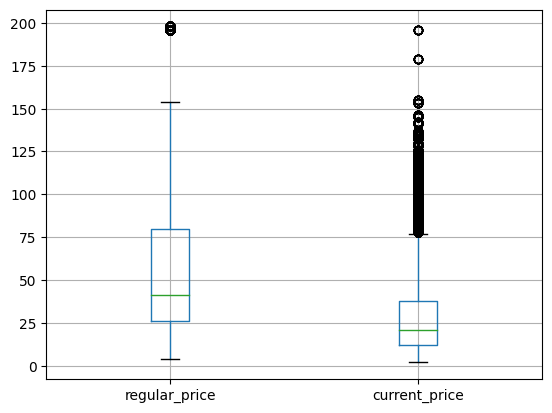

In [ ]:
continous_df.boxplot(column=['regular_price','current_price'])

<Axes: >

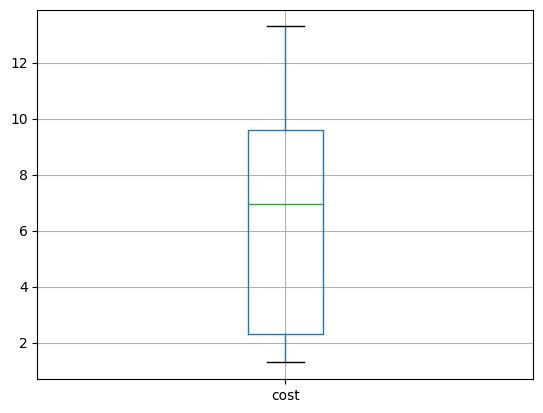

In [ ]:
continous_df.boxplot(column='cost')

<Axes: >

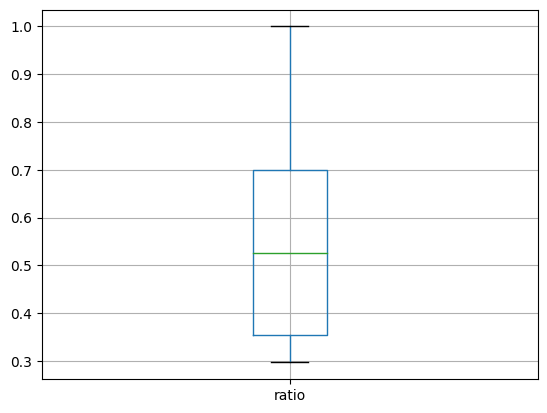

In [ ]:
continous_df.boxplot(column='ratio')

##Categorical variables

In [ ]:
categorical_df = df[['country', 'article', 'retailweek','article.1', 'productgroup', 'category', 'style','sizes','gender']]

###Bar chart

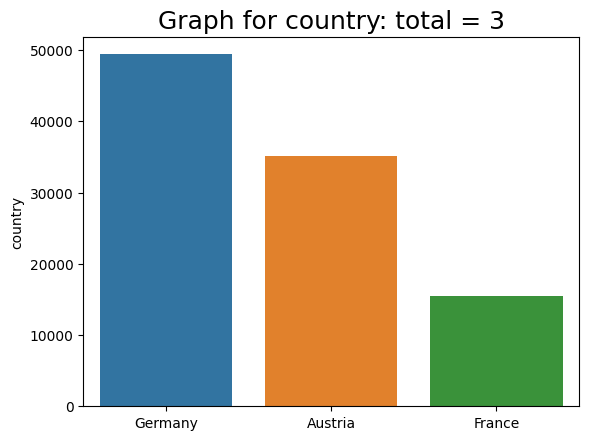

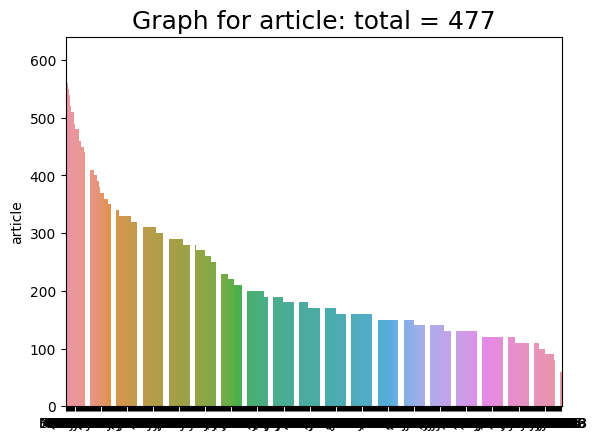

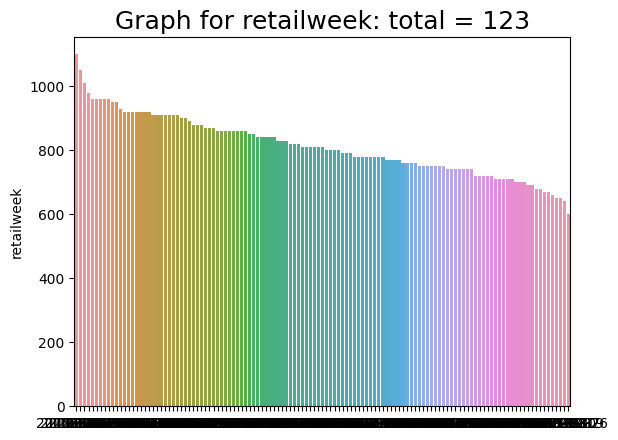

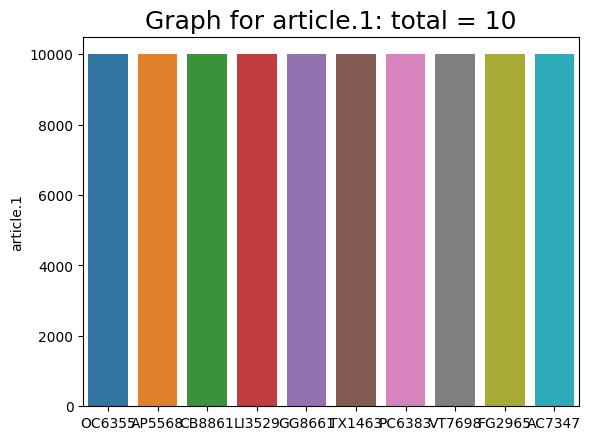

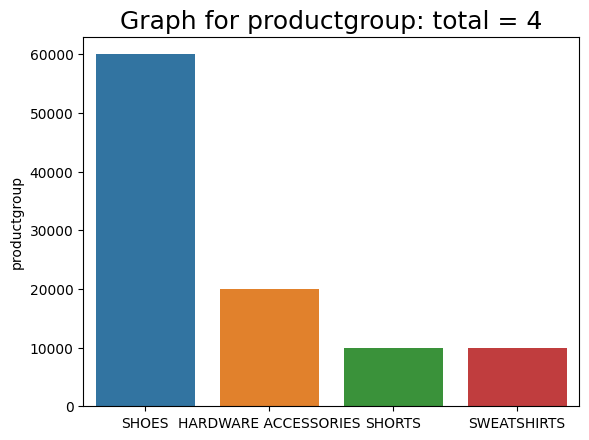

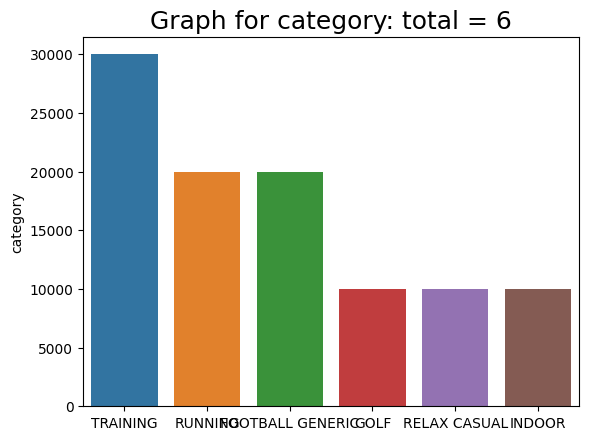

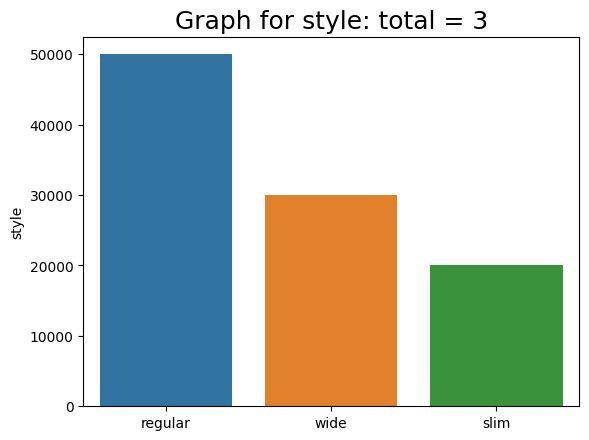

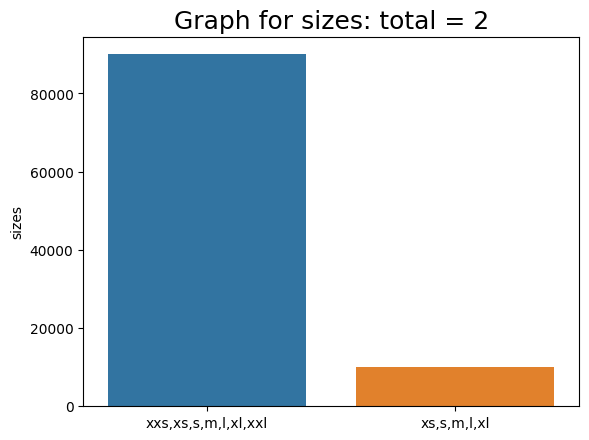

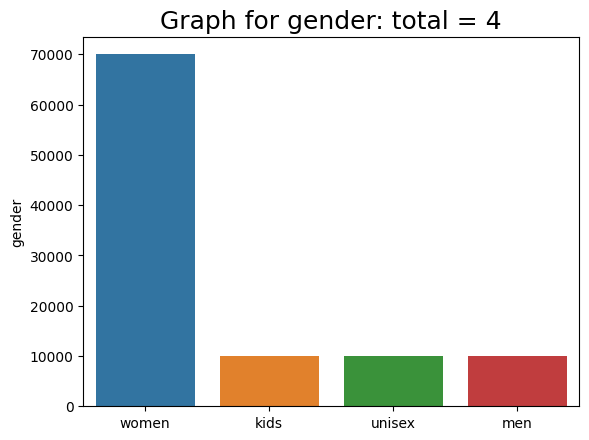

In [ ]:
for i in categorical_df.columns:
  catego_num = categorical_df[i].value_counts()
  plt.title('Graph for %s: total = %d'%(i,len(catego_num)),fontsize=18)
  sns.barplot(x=catego_num.index, y=catego_num)
  plt.show()
  print('\n\n')

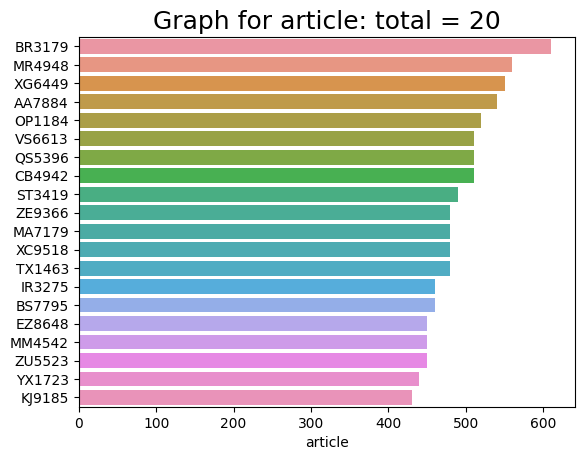

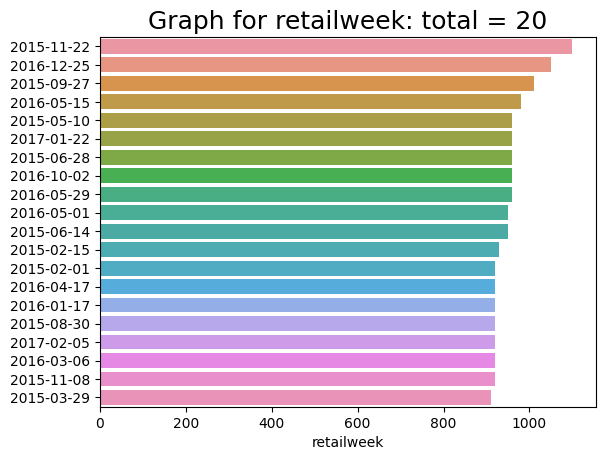

In [ ]:
for i in categorical_df[['article', 'retailweek']].columns:
  catego_num = categorical_df[i].value_counts()[:20]
  plt.title('Graph for %s: total = %d'%(i,len(catego_num)),fontsize=18)
  sns.barplot(x=catego_num, y=catego_num.index)
  plt.show()
  print('\n\n')

###Pivot table

In [ ]:
pivot_df = df[['country','total_sales', 'regular_price', 'current_price','ratio','category', 'cost', 'style', 'productgroup', 'sizes','gender','primary_color','secondary_color','label']]

In [ ]:
pd.pivot_table(pivot_df, index='country', values='total_sales',aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
country,
Germany,66563324.0
Austria,48152895.0
France,21998102.0


In [ ]:
pd.pivot_table(pivot_df, index=['country','gender'], values='total_sales',aggfunc='sum')

total_sales
country gender             
Austria kids      4815289.5
        men       4815289.5
        unisex    4815289.5
        women    33707026.5
France  kids      2199810.2
        men       2199810.2
        unisex    2199810.2
        women    15398671.4
Germany kids      6656332.4
        men       6656332.4
        unisex    6656332.4
        women    46594326.8

In [ ]:
pd.pivot_table(pivot_df, index=['sizes','gender'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

total_sales
sizes               gender             
xxs,xs,s,m,l,xl,xxl women    95700024.7
xs,s,m,l,xl         unisex   13671432.1
xxs,xs,s,m,l,xl,xxl kids     13671432.1
                    men      13671432.1

In [ ]:
pd.pivot_table(pivot_df, index=['country','category'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

total_sales
country category                     
Germany TRAINING           19968997.2
Austria TRAINING           14445868.5
Germany RUNNING            13312664.8
        FOOTBALL GENERIC   13312664.8
Austria FOOTBALL GENERIC    9630579.0
        RUNNING             9630579.0
Germany GOLF                6656332.4
        INDOOR              6656332.4
        RELAX CASUAL        6656332.4
France  TRAINING            6599430.6
Austria GOLF                4815289.5
        RELAX CASUAL        4815289.5
        INDOOR              4815289.5
France  FOOTBALL GENERIC    4399620.4
        RUNNING             4399620.4
        GOLF                2199810.2
        INDOOR              2199810.2
        RELAX CASUAL        2199810.2

In [ ]:
pd.pivot_table(pivot_df, index=['productgroup','category'], values='total_sales').sort_values('total_sales', ascending=False)

total_sales
productgroup         category                     
HARDWARE ACCESSORIES GOLF               1367.14321
                     RUNNING            1367.14321
SHOES                FOOTBALL GENERIC   1367.14321
                     INDOOR             1367.14321
                     RELAX CASUAL       1367.14321
                     RUNNING            1367.14321
                     TRAINING           1367.14321
SHORTS               TRAINING           1367.14321
SWEATSHIRTS          TRAINING           1367.14321

##Models

In [ ]:
model_df = df[['country','sales','ratio','week_number','month','gender','current_price','productgroup','category','style','primary_color','secondary_color', 'label']]

<Axes: >

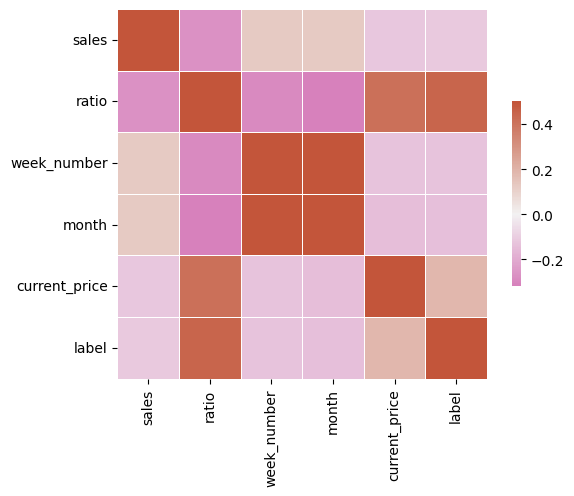

In [ ]:
cmap = sns.diverging_palette(330, 20, as_cmap=True)
sns.heatmap(model_df.corr(), cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Dummy variables

In [ ]:
df_dummy = pd.get_dummies(model_df)
df_dummy.head(10)

,sales,ratio,week_number,month,current_price,label,country_Austria,country_France,country_Germany,gender_kids,...,primary_color_darkkhaki,primary_color_goldenrod,primary_color_gray,primary_color_lightskyblue,primary_color_rosybrown,primary_color_silver,primary_color_steelblue,secondary_color_lavender,secondary_color_lightblue,secondary_color_rosybrown
0,28,0.663866,12,3,3.95,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,28,0.663866,12,3,3.95,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,28,0.663866,12,3,3.95,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,28,0.663866,12,3,3.95,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
4,28,0.663866,12,3,3.95,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,28,0.663866,12,3,3.95,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
6,28,0.663866,12,3,3.95,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,28,0.663866,12,3,3.95,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8,28,0.663866,12,3,3.95,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9,28,0.663866,12,3,3.95,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


###Splitting data and labels

In [ ]:
x = df_dummy.drop('label',axis=1)
y = df_dummy.label.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

###Handling unbalanced dataset

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 11156
Before OverSampling, counts of label '0': 68844 



In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 68844
After OverSampling, counts of label '0': 68844


###Machine Learnig Approach

####Linear Regression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train_res,y_train_res)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

####Decision Tree


In [ ]:
decision_t = DecisionTreeClassifier()
decision_t.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

####Random Forest

In [ ]:
random_f = RandomForestClassifier()
random_f.fit(X_train_res,y_train_res)

RandomForestClassifier()

####Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV

svc=SVC() 
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03]} 
              ]

In [ ]:
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=1)

#grid_search.fit(X_train, y_train)

In [ ]:
'''
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
'''

"\nprint('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))\n\nprint('Parameters that give the best results :','\n\n', (grid_search.best_params_))\n\nprint('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))\n"

###Neural Network Approach (Just for fun)

In [ ]:
classifier = Sequential()


classifier.add(Dense(8, activation='relu'))

classifier.add(Dense(4, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))

classifier.compile( loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = Adam(),
              metrics = ['accuracy'])
history = classifier.fit(X_train_res, y_train_res, epochs = 50, batch_size = 64, validation_data=(X_test, y_test), callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)])

Epoch 1/8
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4822 - accuracy: 0.8442 - val_loss: 0.3604 - val_accuracy: 0.8610
Epoch 2/8
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3483 - accuracy: 0.8596 - val_loss: 0.3408 - val_accuracy: 0.8609
Epoch 3/8
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3319 - accuracy: 0.8590 - val_loss: 0.3237 - val_accuracy: 0.8590
Epoch 4/8
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8588 - val_loss: 0.3113 - val_accuracy: 0.8582
Epoch 5/8
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3134 - accuracy: 0.8580 - val_loss: 0.3060 - val_accuracy: 0.8583
Epoch 6/8
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.8572 - val_loss: 0.3031 - val_accuracy: 0.8608
Epoch 7/8
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.8569 - val_loss: 0.3018 - val_accuracy: 0.8582

##Evaluation

###Traditoinal Machine Learning Models

In [ ]:
pred_1 = logistic.predict(X_test)
pred_2 = decision_t.predict(X_test)
pred_3 = random_f.predict(X_test)

In [ ]:
print('\n\t  Classification report for logestic regression \n'+classification_report(y_test, pred_1))
print('\n\t  Classification report for decision tree  \n'+classification_report(y_test, pred_2))
print('\n\t  Classification report for random forest  \n'+classification_report(y_test, pred_3))


	  Classification report for logestic regression 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     17233
           1       0.42      0.43      0.43      2767

    accuracy                           0.84     20000
   macro avg       0.66      0.67      0.67     20000
weighted avg       0.84      0.84      0.84     20000


	  Classification report for decision tree  
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     17233
           1       0.32      0.38      0.35      2767

    accuracy                           0.80     20000
   macro avg       0.61      0.63      0.62     20000
weighted avg       0.82      0.80      0.81     20000


	  Classification report for random forest  
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     17233
           1       0.39      0.26      0.31      2767

    accuracy                           

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

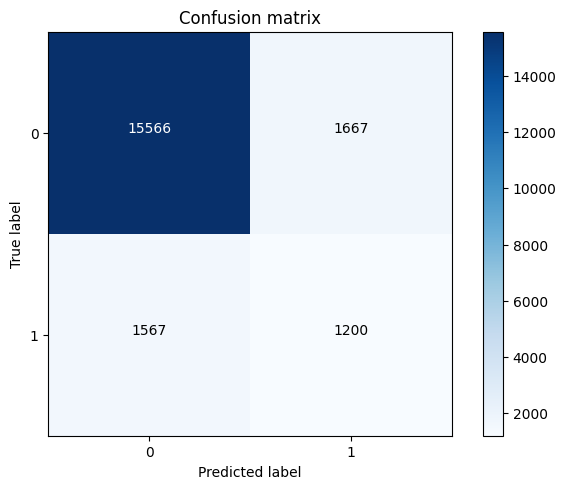

In [ ]:
confusion_mtx = confusion_matrix(y_test, pred_1) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

###Neural Network

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()